<a href="https://colab.research.google.com/github/najiya1017/PRO-FAKE/blob/main/Social_Media_Analysis_for_Efficient_Deep_Learning_Fake_Profile_Identification4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# download dataset

In [ ]:
#upload api key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akumar5189","key":"2696a900cc1140e193898bd7a6284aca"}'}

In [ ]:
# prepare for api command and give permission for read and write
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!rm -rf kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d free4ever1/instagram-fake-spammer-genuine-accounts

Dataset URL: https://www.kaggle.com/datasets/free4ever1/instagram-fake-spammer-genuine-accounts
License(s): Attribution 3.0 Unported (CC BY 3.0)
  0% 0.00/6.81k [00:00<?, ?B/s]
100% 6.81k/6.81k [00:00<00:00, 12.6MB/s]


In [ ]:
#unzip dataset
!unzip /content/instagram-fake-spammer-genuine-accounts.zip &> /dev/null
!rm -rf /content/instagram-fake-spammer-genuine-accounts.zip

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras import utils
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

train = pd.read_csv('train.csv') # load Training dataset
test = pd.read_csv('test.csv') # load Testing dataset
#combine data
df = pd.concat([train, test], ignore_index=True)

In [ ]:
df.head(4)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0


#Exploratory Data Analysis

In [ ]:
# dataset size
print(" size of dataset :",len(df))


 size of dataset : 696


In [ ]:
# target count
target_count = df.fake.value_counts()
target_count

fake
0    348
1    348
Name: count, dtype: int64

In [ ]:
print('target have {}% for non-fake and {}% for fake.'.format(round(100*(target_count[1]/target_count.sum())),
                                                                  round(100*(target_count[0]/target_count.sum()))))

target have 50% for non-fake and 50% for fake.


In [ ]:
df.shape

(696, 12)

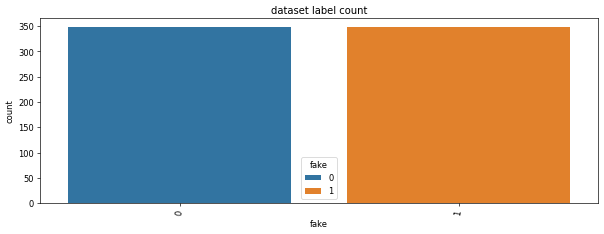

In [ ]:
# graphical analysis
plt.figure(dpi=60,figsize=(12,4))
sns.countplot(x ='fake', data=df, hue = "fake")
plt.xticks(rotation =80)
plt.title('dataset label count')
plt.show()

In [ ]:
# Check descriptive statistics
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,6.960000e+02,696.000000,696.00000
mean,0.711207,0.166609,1.475575,0.042170,0.035920,23.412356,0.113506,0.369253,103.244253,7.914991e+04,555.086207,0.50000
std,0.453527,0.218964,1.076622,0.143664,0.186223,38.595721,0.317438,0.482950,378.028168,8.428875e+05,1023.613869,0.50036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+01,61.000000,0.00000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,252.000000,0.50000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,77.000000,6.930000e+02,601.750000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


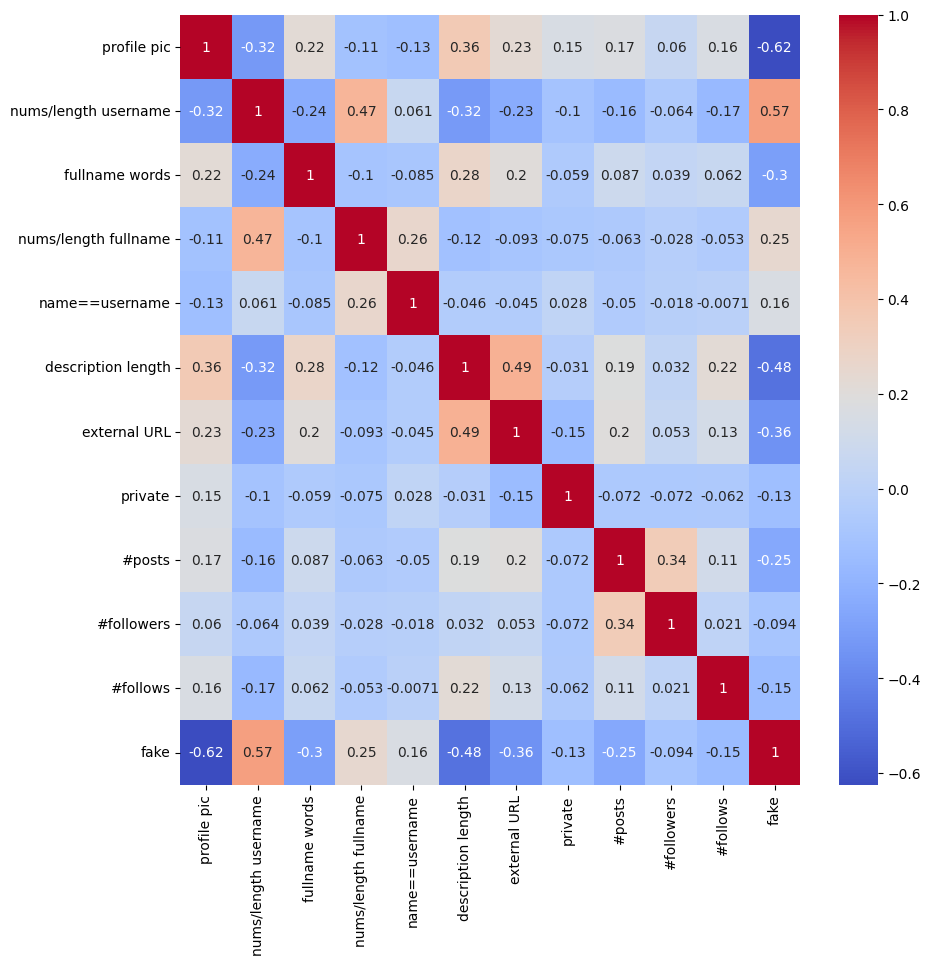

In [ ]:
# correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           696 non-null    int64  
 1   nums/length username  696 non-null    float64
 2   fullname words        696 non-null    int64  
 3   nums/length fullname  696 non-null    float64
 4   name==username        696 non-null    int64  
 5   description length    696 non-null    int64  
 6   external URL          696 non-null    int64  
 7   private               696 non-null    int64  
 8   #posts                696 non-null    int64  
 9   #followers            696 non-null    int64  
 10  #follows              696 non-null    int64  
 11  fake                  696 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 65.4 KB


#Preprocessing

In [ ]:
# Check  the missing values

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', ascending=False)

,percent_missing (%)
profile pic,0.0
nums/length username,0.0
fullname words,0.0
nums/length fullname,0.0
name==username,0.0
description length,0.0
external URL,0.0
private,0.0
#posts,0.0
#followers,0.0


In [ ]:
# check nan values
df.isna().any()

profile pic             False
nums/length username    False
fullname words          False
nums/length fullname    False
name==username          False
description length      False
external URL            False
private                 False
#posts                  False
#followers              False
#follows                False
fake                    False
dtype: bool

In [ ]:
# check  duplicated rows
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1
637,1,0.27,1,0.0,0,0,0,0,0,45,64,1
639,0,0.00,1,0.0,1,0,0,0,0,69,694,1
643,0,0.00,1,0.0,1,0,0,0,0,69,694,1
659,1,0.27,1,0.0,0,0,0,0,0,45,64,1


In [ ]:
# Removing duplicates
df.drop_duplicates(inplace = True)


In [ ]:
# new dataset size
print(" size of dataset :",len(df))


 size of dataset : 692


In [ ]:
target=np.array(df['fake'])
data = df.drop('fake',axis=1)
inp_data = np.array(data)
inp_data = np.float64(inp_data)

# dataspliting

In [ ]:
# for machine learning
xtrain,xtest,ytrain,ytest = train_test_split(inp_data,target,test_size=0.2,random_state=100)

In [ ]:
# for deep learning
x_train = xtrain.reshape((xtrain.shape[0],1,xtrain.shape[1]))
x_test = xtest.reshape((xtest.shape[0],1,xtest.shape[1]))

#SVM classifier (Machine Learning)

In [ ]:


# svm training
svm = SVC()
svm.fit(xtrain,ytrain)


SVC()

In [ ]:
predictions = svm.predict(xtest)
svm_acc = accuracy_score(ytest, predictions)
print("Accuracy svm : ",svm_acc)

Accuracy svm :  0.48201438848920863


Confusion Matrix:
[[ 4 72]
 [ 0 63]]


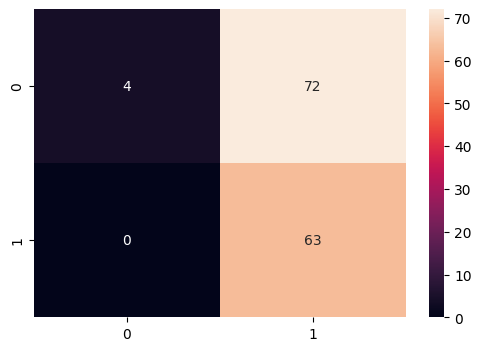

In [ ]:
cm = confusion_matrix(ytest,predictions)
print("Confusion Matrix:\n{}".format(cm))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

#KNN classifier (Machine Learning)

In [ ]:

knn = KNeighborsClassifier(2).fit(xtrain, ytrain)
predictions = knn.predict(xtest)
acc = accuracy_score(ytest,predictions)
print("Accuracy knn : ", acc)

Accuracy knn :  0.8345323741007195


Confusion Matrix:
[[73  3]
 [20 43]]


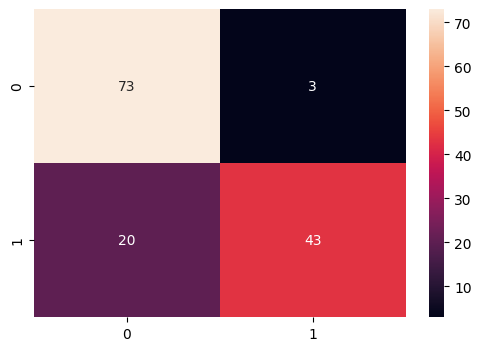

In [ ]:

cm = confusion_matrix(ytest,predictions)
print("Confusion Matrix:\n{}".format(cm))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

#Multi-Layer Perceptron Classifier

In [ ]:

clf = MLPClassifier(random_state=1, max_iter=300).fit(xtrain, ytrain)


In [ ]:
predictions = clf.predict(xtest)
clf_acc = accuracy_score(ytest,predictions)
print("Accuracy MLP Classifier : ", clf_acc)

Accuracy MLP Classifier :  0.7697841726618705


Confusion Matrix:
[[74  2]
 [30 33]]


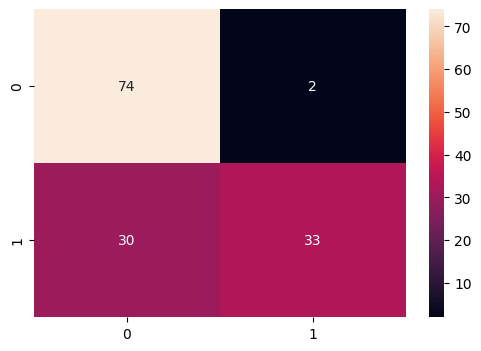

In [ ]:
cm = confusion_matrix(ytest,predictions)
print("Confusion Matrix:\n{}".format(cm))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

#LSTM

In [ ]:
model = keras.Sequential()
model.add(layers.Conv1D(128,1, activation='relu',input_shape=(x_train.shape[1],11)))
model.add(layers.LSTM(25,return_sequences=True))
model.add(layers.SimpleRNN(20))
model.add(layers.Dense(400))
model.add(layers.ELU())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 128)            1536      
                                                                 
 lstm (LSTM)                 (None, 1, 25)             15400     
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                920       
                                                                 
 dense (Dense)               (None, 400)               8400      
                                                                 
 elu (ELU)                   (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 8

In [ ]:
history = model.fit(x_train,ytrain,epochs=100, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 8s 62ms/step - loss: 0.5499 - accuracy: 0.7240 - val_loss: 0.4597 - val_accuracy: 0.8108
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4539 - accuracy: 0.8371 - val_loss: 0.3932 - val_accuracy: 0.8649
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4262 - accuracy: 0.8122 - val_loss: 0.4812 - val_accuracy: 0.7568
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4120 - accuracy: 0.8167 - val_loss: 0.3876 - val_accuracy: 0.8559
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4029 - accuracy: 0.8145 - val_loss: 0.4576 - val_accuracy: 0.8559
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.3900 - accuracy: 0.8394 - val_loss: 0.3876 - val_accuracy: 0.8739
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 0.3705 - accuracy: 0.8597 - val_loss: 0.3751 - val_accuracy: 0.8739
Epoch 8/

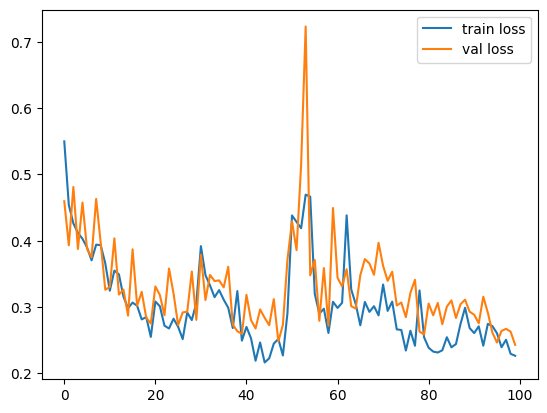

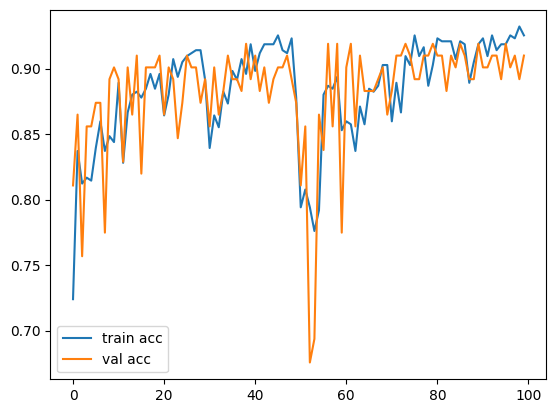

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

5/5 [==============================] - 1s 13ms/step
        Accuracy: 90.65%
Confusion Matrix:
[[70  6]
 [ 7 56]]


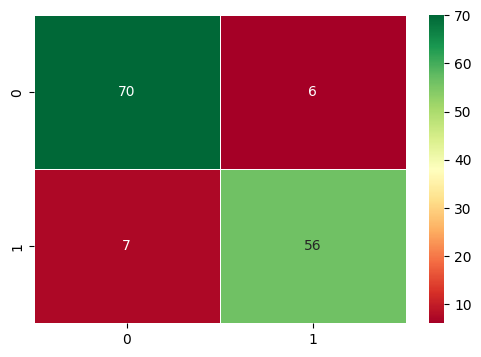

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
acc = accuracy_score(ytest, pred)
cm = confusion_matrix(ytest, pred)
print("        Accuracy: {:.2f}%".format(acc*100))
print("Confusion Matrix:\n{}".format(cm))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",cmap='RdYlGn',linewidths=0.5)
plt.show()

#fusion

5/5 [==============================] - 0s 3ms/step
        Accuracy: 90.65%
Confusion Matrix:
[[70  6]
 [ 7 56]]


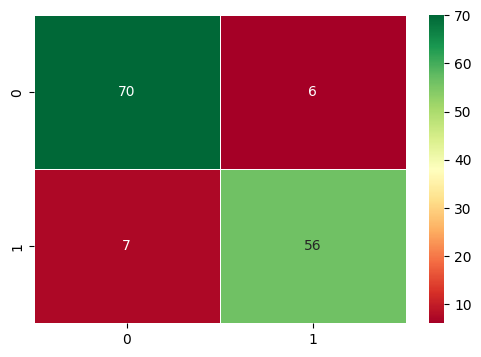

In [ ]:
def get_result(xtest):
  pb2 = knn.predict_proba(xtest)
  x_test = xtest.reshape((xtest.shape[0],1,xtest.shape[1]))
  pb1 = model.predict(x_test)
  w1=0.7
  w2 =0.2
  pb = w1*pb1+w2*pb2

  pred = np.argmax(pb,axis=1)
  return pred
pred = get_result(xtest)
acc = accuracy_score(ytest, pred)
cm = confusion_matrix(ytest, pred)
print("        Accuracy: {:.2f}%".format(acc*100))
print("Confusion Matrix:\n{}".format(cm))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",cmap='RdYlGn',linewidths=0.5)
plt.show()



In [ ]:
xtest.shape

(139, 11)

#FLASK

In [ ]:
from google.colab import drive
drive.mount('mydrive')

Mounted at mydrive


In [ ]:
!unzip /content/mydrive/MyDrive/flaskapp_fake_socialmedia3.zip -d /content

Archive:  /content/mydrive/MyDrive/flaskapp_fake_socialmedia3.zip
   creating: /content/static/
  inflating: /content/static/im.jpeg  
  inflating: /content/static/style.css  
  inflating: /content/static/style2.css  
   creating: /content/templates/
  inflating: /content/templates/home.html  
  inflating: /content/templates/index.html  
  inflating: /content/templates/result.html  


In [ ]:
!pip install pyngrok -q

In [ ]:
from pyngrok import ngrok, conf
token = "2eztvNplOtga9rilPbv8NMIsfMY_5UvygYJKgBpjrirsjDcTG"
conf.get_default().auth_token = token
# Open a TCP ngrok tunnel to the SSH server
connection_string = ngrok.connect("22", "tcp").public_url

ssh_url, port = connection_string.strip("tcp://").split(":")
print(f" * ngrok tunnel available, access with `ssh root@{ssh_url} -p{port}`")

 * ngrok tunnel available, access with `ssh root@0.tcp.ngrok.io -p16845`


In [ ]:
import os
import threading
import time
from flask import Flask,render_template,request
from pyngrok import ngrok
import re
import pandas as pd

app = Flask(__name__,template_folder='templates',static_folder='static')
port = "2000"

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(public_url)
# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

# Define Flask routes
@app.route("/")
def home():
    return render_template("home.html")
@app.route('/predict', methods=['GET','POST'])
def predict():
    input_data = []
    result = None
    if request.method == 'POST':
        input_data.append(request.form.get("profilepic").lower())
        username = request.form.get("nctulr")
        nctulr = len(re.findall(r'\d+',username))/len(username)
        input_data.append(nctulr)
        fullname = request.form.get("fnwc")
        fnwc = len(fullname.split())
        input_data.append(float(fnwc))
        nctfnlr = len(re.findall(r'\d+',fullname))/len(fullname)
        input_data.append(float(nctfnlr))
        # input_data.append(float(request.form.get("nctfnlr")))
        # input_data.append(float(request.form.get("nmun")))
        nmun = 1 if username==fullname else 0
        input_data.append(float(nmun))
        # input_data.append(float(request.form.get("dsl")))
        dsl = len(request.form.get("dsl"))
        input_data.append(float(dsl))
        input_data.append(request.form.get("urb").lower())
        input_data.append(request.form.get("pf").lower())
        input_data.append(float(request.form.get("nop")))
        input_data.append(float(request.form.get("nof")))
        input_data.append(float(request.form.get("nofs")))
        data = pd.Series(input_data)
        data = data.replace('no',0)
        data = data.replace('yes',1)
        inp = np.array(data)
        inp=inp.reshape(1,len(inp))
        res= get_result(inp)
        if res:
          result='FAKE'
        else:
          result = 'REAL'
        return render_template("result.html",result=result)
    return render_template("index.html")

@app.route("/result")
def result():
    return render_template("result.html")



# Start the Flask server in a new thread
threading.Thread(target=app.run(port=port), kwargs={"use_reloader": False}).start()

https://3627-35-237-125-16.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:2000
INFO:werkzeug:Press CTRL+C to quit
